In [1]:
import numpy as np
import pandas as pd


#Plotting and viz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('data/train_ver2.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_27990/1192977624.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train_ver2.csv')


In [3]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Data Overview

In [4]:
print(f"The Dataset contains {df_train.shape[0]} Recrods and {df_train.shape[1]} columns")

The Dataset contains 13647309 Recrods and 48 columns


In [5]:
print("The datatypes are")
df_train.dtypes

The datatypes are


fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [6]:
missing_value_percentage = df_train.isnull().sum()/len(df_train) * 100
higher_missing_values = missing_value_percentage[missing_value_percentage > 50]
print("The columns which are having more than 50 percent of Null Values : ")
higher_missing_values

The columns which are having more than 50 percent of Null Values : 


ult_fec_cli_1t    99.818330
conyuemp          99.986752
dtype: float64

Total Missing values


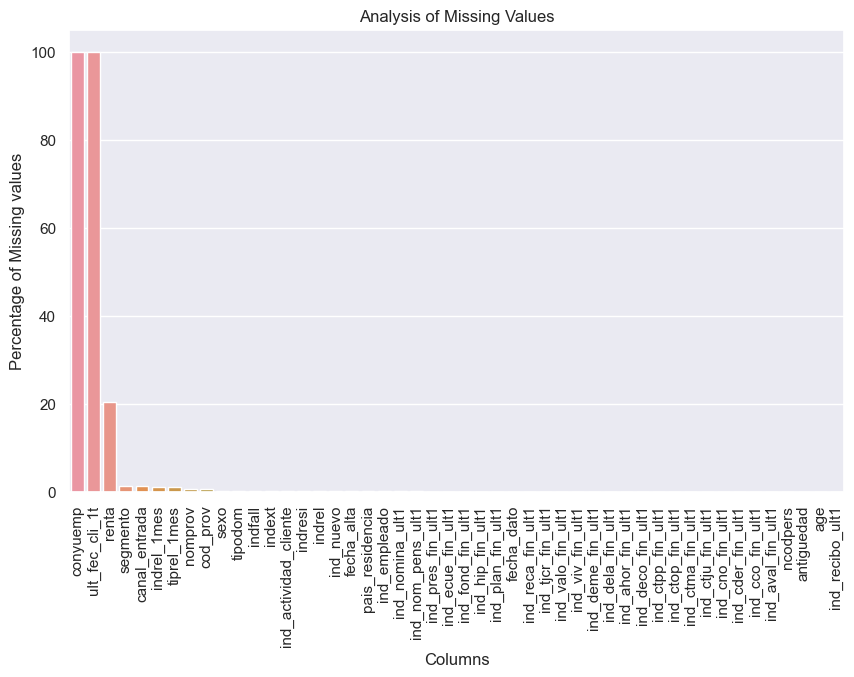

In [7]:
print("Total Missing values")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

missing_value_percentage = missing_value_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_value_percentage.index,y=missing_value_percentage.values)
plt.xticks(rotation = 90)
plt.title("Analysis of Missing Values")
plt.ylabel("Percentage of Missing values")
plt.xlabel("Columns")
plt.show()

In [8]:
#Drop those columns which are almost entirely null
cols_to_drop = ['ult_fec_cli_1t','conyuemp']
df_train.drop(columns = cols_to_drop,inplace=True)

print("After Removing the columns")
df_train.info()

After Removing the columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               ob

In [9]:
def compute_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values.sort_values(ascending=False)

    return missing_values

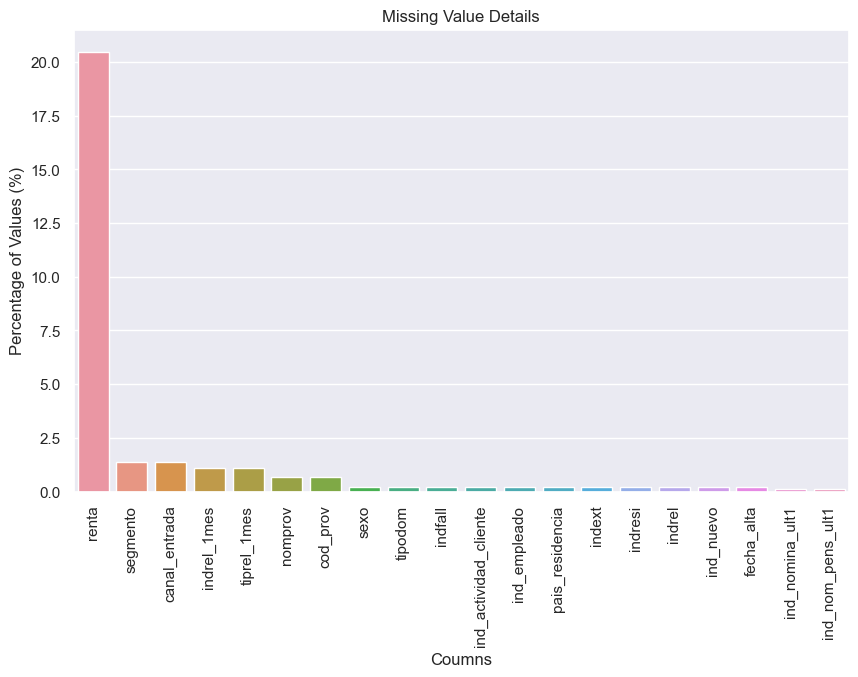

renta                    20.475648
segmento                  1.387585
canal_entrada             1.363829
indrel_1mes               1.097513
tiprel_1mes               1.097513
nomprov                   0.685784
cod_prov                  0.685784
sexo                      0.203732
tipodom                   0.203227
indfall                   0.203220
ind_actividad_cliente     0.203220
ind_empleado              0.203220
pais_residencia           0.203220
indext                    0.203220
indresi                   0.203220
indrel                    0.203220
ind_nuevo                 0.203220
fecha_alta                0.203220
ind_nomina_ult1           0.117701
ind_nom_pens_ult1         0.117701
dtype: float64


In [10]:
missing_value_percentage = df_train.isnull().sum()/len(df_train) * 100

missing_value_percentage = missing_value_percentage[missing_value_percentage > 0]
missing_value_percentage = missing_value_percentage.sort_values(ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x=missing_value_percentage.index,y=missing_value_percentage.values)
plt.xticks(rotation = 90)
plt.title("Missing Value Details")
plt.ylabel("Percentage of Values (%)")
plt.xlabel("Coumns")
plt.show()

print(missing_value_percentage.T)

In [11]:
#Age column is of type object, converting it to numeric
df_train['age'] = df_train['age'].replace(' NA', np.nan) # Replace ' NA' strings with NaN

#As we did not consider this while analysing missing values
print(df_train['age'].isnull().sum())

#Converting Age to float for further analysis
df_train['age'] = df_train['age'].astype(float)

27734


In [12]:
#Number of unique customer is the Dataset
df_train['ncodpers'].nunique()

956645

In [13]:
#Numerical Analysis of the columns
product_columns = [col for col in df_train.columns if col.endswith('ult1')] #Removing the product columns since values are 0 or 1
df_train_subset = df_train.drop(columns = product_columns,axis=1)

In [15]:
df_train_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
ncodpers,13647309.0,834904.211501,431565.025784,15889.00,452813.00,931893.0,1199286.00,1553689.00
age,13619575.0,40.181465,17.185087,2.00,24.00,39.0,50.00,164.00
ind_nuevo,13619575.0,0.059562,0.236673,0.00,0.00,0.0,0.00,1.00
indrel,13619575.0,1.178399,4.177469,1.00,1.00,1.0,1.00,99.00
tipodom,13619574.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
cod_prov,13553718.0,26.571470,12.784017,1.00,15.00,28.0,35.00,52.00
ind_actividad_cliente,13619575.0,0.457811,0.498217,0.00,0.00,0.0,1.00,1.00
renta,10852934.0,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51


In [16]:
numerical_columns = df_train_subset.select_dtypes(include=np.number).columns
print(numerical_columns)

Index(['ncodpers', 'age', 'ind_nuevo', 'indrel', 'tipodom', 'cod_prov',
       'ind_actividad_cliente', 'renta'],
      dtype='object')


### Data Imputing

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               object 
 22  ind_ahor_fin_ult

In [18]:
df_train['segmento'] = df_train['segmento'].fillna(df_train['segmento'].mode()[0])
df_train['segmento'].isnull().sum()

0

In [19]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}
df_vip_customer_list = df_train[df_train['segmento'] == '01 - TOP']


In [20]:
df_regular_customer_list = df_train[df_train['segmento']=='02 - PARTICULARES']
df_student_customer_list =df_train[df_train['segmento']=='03 - UNIVERSITARIO']

In [21]:
print(f"Total Records in VIP List : {df_vip_customer_list.shape[0]}")
missing_vip_values = compute_missing_values(df_vip_customer_list)
missing_vip_values

Total Records in VIP List : 562142


renta                82367
cod_prov              3741
nomprov               3741
canal_entrada           16
ind_nomina_ult1          5
ind_nom_pens_ult1        5
dtype: int64

In [22]:
print(f"Total Records in Regular Customer List : {df_regular_customer_list.shape[0]}")
missing_regular_values = compute_missing_values(df_regular_customer_list)
missing_regular_values

Total Records in Regular Customer List : 8149588


renta                    1569877
canal_entrada             185970
indrel_1mes               149772
tiprel_1mes               149772
nomprov                    85098
cod_prov                   85098
sexo                       27804
tipodom                    27735
ind_empleado               27734
ind_actividad_cliente      27734
indfall                    27734
indext                     27734
pais_residencia            27734
indresi                    27734
indrel                     27734
ind_nuevo                  27734
fecha_alta                 27734
age                        27734
ind_nomina_ult1            16042
ind_nom_pens_ult1          16042
dtype: int64

In [23]:
print(f"Total Records in Student Customer List: {df_student_customer_list.shape[0]}")
missing_student_values = compute_missing_values(df_student_customer_list)
missing_student_values

Total Records in Student Customer List: 4935579


renta                1142131
cod_prov                4752
nomprov                 4752
canal_entrada            140
ind_nomina_ult1           16
ind_nom_pens_ult1         16
indrel_1mes                9
tiprel_1mes                9
dtype: int64

### Methods to deal with the Null Values

**Option 1:**

Remove the records

- columns like `ind_nomina_ult1 - 0.117701` & `ind_nom_pens_ult1 - 0.117701` have only very less number of null values. If we remove those records, we are removing around 15,012 rows (approximately from the total `df_train` dataset). Comparing the size of the entire dataset, it does not make a huge difference, So we can remove these records.


 

#### Dealing Null Values in `Income`

In [24]:
df_train.dropna(subset=['ind_nomina_ult1','ind_nom_pens_ult1'],inplace = True)

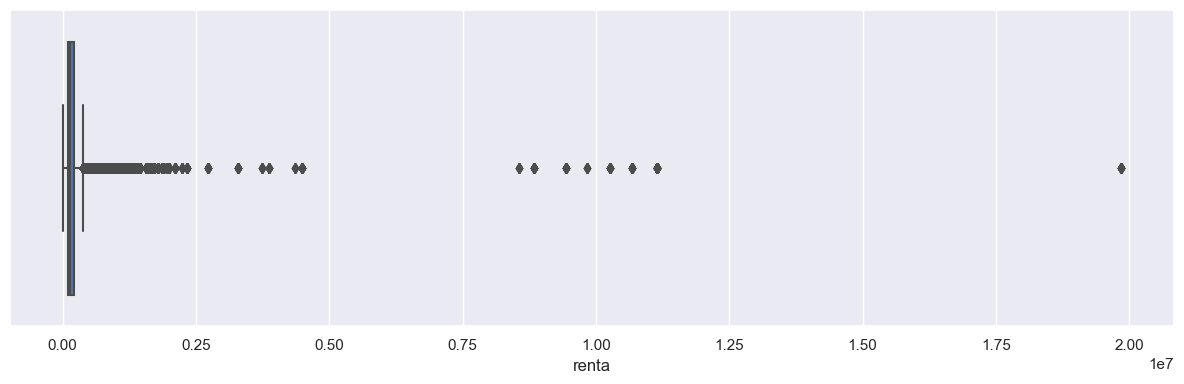

The minumum Annua income in VIP group : 3796.86
The maximum Annual income in VIP group : 19849331.97
The Median annual income of the group : 141562.68
Average VIP customers annual income : 175853.0885455057


In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_vip_customer_list['renta'])
plt.tight_layout()
plt.show()

print(f"The minumum Annua income in VIP group : {df_vip_customer_list['renta'].min()}")
print(f"The maximum Annual income in VIP group : {df_vip_customer_list['renta'].max()}")
print(f"The Median annual income of the group : {df_vip_customer_list['renta'].median()}")
print(f"Average VIP customers annual income : {df_vip_customer_list['renta'].mean()}")

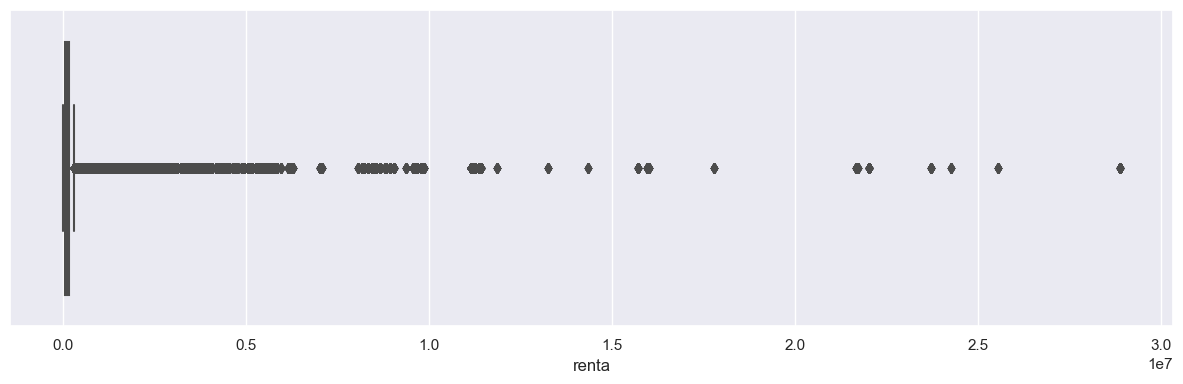

The minumum Annual income in Regular group : 1471.23
The maximum Annual income in Regular group : 28894395.51
The median annual income of the group : 107942.46
Average Regualar customers annual income : 141496.53034630077


In [26]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_regular_customer_list['renta'])
plt.tight_layout()
plt.show()


print(f"The minumum Annual income in Regular group : {df_regular_customer_list['renta'].min()}")
print(f"The maximum Annual income in Regular group : {df_regular_customer_list['renta'].max()}")
print(f"The median annual income of the group : {df_regular_customer_list['renta'].median()}")
print(f"Average Regualar customers annual income : {df_regular_customer_list['renta'].mean()}")

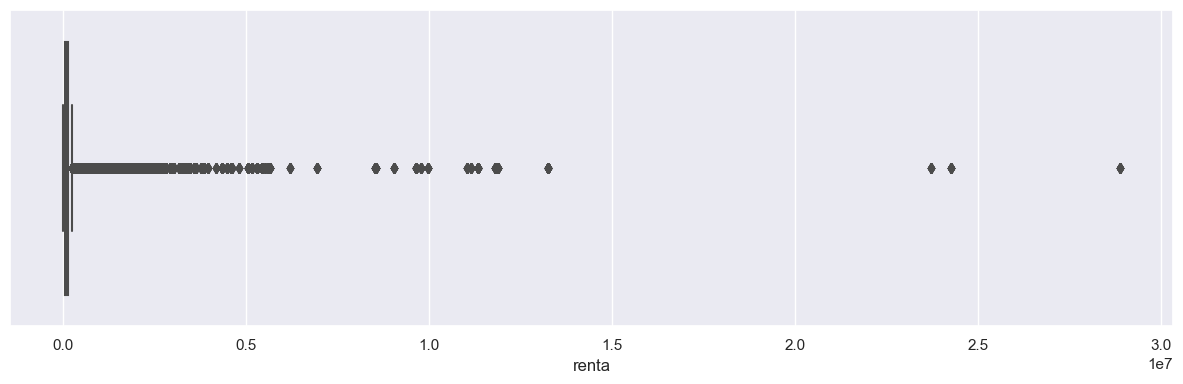

The minumum Annual income in students group : 1202.73
The maximum Annual income in students group : 28894395.51
The Median annual income of the group : 88740.27
Average students customers annual income : 116431.55839100214


In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_student_customer_list['renta'])
plt.tight_layout()
plt.show()


print(f"The minumum Annual income in students group : {df_student_customer_list['renta'].min()}")
print(f"The maximum Annual income in students group : {df_student_customer_list['renta'].max()}")
print(f"The Median annual income of the group : {df_student_customer_list['renta'].median()}")
print(f"Average students customers annual income : {df_student_customer_list['renta'].mean()}")


Since the `renta` (Annual Income) has large outliers and skewness, I'm using median to impute the missing values in each segments. 

In [28]:
df_train['renta']=df_train['renta'].fillna(
    df_train.groupby('segmento')['renta'].transform('median')
)

In [29]:
df_train['renta'].isnull().sum()

0

#### Dealing Null Values in `Age` and `Sex`

In [30]:
#Sex and Age are only missing in Regular Customers 
#We'll impute sex with mode(as it is categorical) and age with median(as the data is skewed)
df_train['sexo'] = df_train['sexo'].fillna(
    df_train.groupby('segmento')['sexo'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)
df_train['sexo'].isnull().sum()

0

In [31]:
#Age
df_train['age']=df_train['age'].fillna(
    df_train.groupby('segmento')['age'].transform('median')
)
df_train.age.isnull().sum()

0

In [32]:
missing_values_test = compute_missing_values(df_train)
missing_values_test

canal_entrada            170215
indrel_1mes              133935
tiprel_1mes              133935
cod_prov                  77745
nomprov                   77745
tipodom                   11889
ind_empleado              11888
pais_residencia           11888
fecha_alta                11888
ind_nuevo                 11888
indrel                    11888
indresi                   11888
indext                    11888
indfall                   11888
ind_actividad_cliente     11888
dtype: int64

In [33]:
df_train.dropna(subset=['ind_empleado','tipodom'],inplace = True)

#### The missing values in `canal_entrada` is filled with unknown as there were a lot of records and mode imputing didn't feel like a good technique

In [34]:
df_train['canal_entrada']=df_train['canal_entrada'].fillna('Unknown')
df_train['canal_entrada'].isnull().sum()

0

#### Assumption and Logic in imputing `indrel_1mes` and `tiprel_1mes`

- If the customer is a student (segmento == '03 - UNIVERSITARIO') or has 0 months of seniority (antiguedad == 0), they are likely new or not yet active, so we impute 'P' (Potential).

- Otherwise, the default most common relationship is '1' (Primary), so we impute '1'.

**Assumption**: Students and new customers are more likely to be potential users, while others can be safely treated as standard active customers.

- If their indrel_1mes is 'P' (Potential), it makes sense to set their relationship type as 'R' (Potential).

- For everyone else, assume 'A' (Active) unless evidence suggests otherwise.

**Assumption**: If someone is a potential customer, their relationship with the bank is also potential ('R'). For others, active status is a safe assumption.

In [35]:
df_train['indrel_1mes'].unique()

array([1.0, 3.0, 2.0, nan, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [36]:
# Convert all values to string
df_train['indrel_1mes'] = df_train['indrel_1mes'].astype(str)

# Strip any trailing .0 (e.g., '3.0' -> '3') and whitespace
df_train['indrel_1mes'] = df_train['indrel_1mes'].str.strip().str.replace(r'\.0$', '', regex=True)

# Replace 'nan' string with actual NaN
df_train['indrel_1mes'] = df_train['indrel_1mes'].replace('nan', np.nan)

# View cleaned unique values
print(df_train['indrel_1mes'].unique())

['1' '3' '2' nan '4' 'P']


In [37]:
# Create mask where the condition is True
mask = (df_train['indrel_1mes'].isna()) & (
    (df_train['segmento'] == '03 - UNIVERSITARIO') | (df_train['antiguedad'] == 0)
)

# Fill only those positions with 'P', rest with '1'
df_train.loc[mask, 'indrel_1mes'] = 'P'
df_train['indrel_1mes'].fillna('1', inplace=True)

print(df_train['indrel_1mes'].isnull().sum())

0


In [38]:
df_train['tiprel_1mes'].unique()

array(['A', 'I', 'P', nan, 'R', 'N'], dtype=object)

In [39]:
df_train['tiprel_1mes'] = df_train['tiprel_1mes'].fillna(
    df_train['indrel_1mes'].apply(lambda x: 'R' if x == 'P' else 'A')
)
df_train['tiprel_1mes'].isnull().sum()

0

#### Missing Values in `cod_prov` and `nom_prov`

In [40]:
missing_set = compute_missing_values(df_train)
missing_set

cod_prov    65856
nomprov     65856
dtype: int64

In [41]:
df_train['cod_prov'].fillna(df_train['cod_prov'].mode()[0],inplace=True)
df_train['nomprov'].fillna(df_train['nomprov'].mode()[0],inplace=True)

In [42]:
df_train.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

In [43]:
print(f"After Cleaning the dataset, there are {df_train.shape[0]} records and {df_train.shape[1]} columns")

After Cleaning the dataset, there are 13619357 records and 46 columns


In [44]:
df_train.to_csv('data/cleaned_santander_data.csv', index=False)
print("Cleaned data saved to data folder")

Cleaned data saved to data folder


In [ ]:
baseline_preds.rename(columns={'prediction': 'added_products'}, inplace=True)

In [1]:
import pandas as pd

In [8]:
df_test = pd.read_csv('data/test_ver2.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_75198/1670766928.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('data/test_ver2.csv')


In [3]:
df_test.shape

(929615, 24)

In [ ]:
# Get unique customers in May 2016
test_users = df_test['ncodpers'].unique()

# Predict same top 7 for all
baseline_test_preds = pd.DataFrame({
    'ncodpers': test_users,
    'added_products': [' '.join(top_7_products)] * len(test_users)
})

In [ ]:
baseline_test_preds.to_csv('data/kaggle_submission.csv',index=False)

In [16]:
baseline_preds

,ncodpers,added_products
0,15889,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
1,1170544,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
2,1170545,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
3,1170547,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
4,1170548,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
...,...,...
929610,660237,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
929611,660238,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
929612,660240,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...
929613,660243,ind_cco_fin_ult1 ind_recibo_ult1 ind_nom_pens_...


### Feature Engineering

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619357 entries, 0 to 13619356
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             int64  
 9   indrel                 float64
 10  indrel_1mes            object 
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  tipodom                float64
 17  cod_prov               float64
 18  nomprov                object 
 19  ind_actividad_cliente  float64
 20  renta                  float64
 21  segmento               object 
 22  ind_ahor_fin_ult

In [20]:
df_train.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

### Collaborative Filtering

**What is CF?**

Collaborative Filtering recommends items based on user–item interaction patterns rather than item content or user demographics.

Two main types:

- User-based CF: Finds similar users and recommends items they liked.

- Item-based CF: Finds similar items and recommends items similar to what a user already has.



In [2]:
pip install scikit-surprise

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp38-cp38-macosx_11_0_arm64.whl size=497756 sha256=ca29a97506cbad4c4f588e4cc3b5407d7fbdbdcbec13021e55a4bcf7fd7f61b8
  Stored in directory: /Users/dennis_m_jose/Library/Caches/pip/wheels/99/34/23/b19f7de7352af5d1913f2654641432d6740c2666eecf2472ea
Successfully built scikit-surprise

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader


#### Get the cleaned Dataset

**Extracting Product Additions**

The source dataset contains monthly snapshots of each customer’s product ownership.

We focus on newly added products in each month (as the target to predict).

**Logic:**

- Sort data by ncodpers (customer ID) and fecha_dato (month).

- Shift previous month's values for each product.

- Compare current vs previous month:

    - If product changed from 0 → 1, mark as added (1).

    - Else mark as 0.

This results in a product_diff DataFrame:


ncodpers | fecha_dato | prod_1 | prod_2 | ... | prod_24

111111   | 2015-02    |   0    |   1    | ... |   0


Each column indicates if a product was newly added that month.

In [4]:
df_train = pd.read_csv('data/cleaned_santander_data.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_43174/2215840755.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/cleaned_santander_data.csv')


In [5]:
ult1_columns = [col for col in df_train.columns if col.endswith('ult1')]

In [9]:

df_train['fecha_dato'] = pd.to_datetime(df_train['fecha_dato'])

#Preparing Data for viz
df_train_copy = df_train.sort_values(['ncodpers', 'fecha_dato'])
cols_to_use = ['ncodpers', 'fecha_dato'] + ult1_columns
df_small = df_train[cols_to_use].copy()


for col in ult1_columns:
    df_small[col] = df_small[col].fillna(0).astype('int8')

df_small.sort_values(['ncodpers', 'fecha_dato'], inplace=True)


product_cols = ult1_columns
product_diff = pd.DataFrame(0, index=df_small.index, columns=product_cols)

#Processing in batches to avoid kernel crash
unique_ids = df_small['ncodpers'].unique()
batch_size = 100000

for i in range(0, len(unique_ids), batch_size):
    batch_ids = unique_ids[i:i + batch_size]
    batch_df = df_small[df_small['ncodpers'].isin(batch_ids)].copy()

    # Shift previous month’s values
    shifted = batch_df.groupby('ncodpers')[product_cols].shift(1).fillna(0).astype('int8')
    
    # Only count additions: where previous = 0 and current = 1
    additions = ((batch_df[product_cols] - shifted) == 1).astype('int8')
    
    # Assign to product_diff
    product_diff.loc[batch_df.index] = additions


product_diff['fecha_dato'] = df_small['fecha_dato']
product_diff['ncodpers'] = df_small['ncodpers']
product_diff.to_csv('data/product_diff.csv', index=False)


In [9]:
product_diff = pd.read_csv('data/product_diff.csv')
product_diff

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_dato,ncodpers
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,2015-01-28,15889
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015-02-28,15889
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015-03-28,15889
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015-04-28,15889
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2015-05-28,15889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13619352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-05-28,1553685
13619353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-05-28,1553686
13619354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-05-28,1553687
13619355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-05-28,1553688


#### Create the Collaborative Filter DataFrame

**How It’s Used Here**

- We treat each (user, product) pair where product was added as an interaction.

- The data is reshaped into a long format:

        ncodpers | fecha_dato | product | added

        111111   | 2015-02    | prod_1  |   1

        111111   | 2015-03    | prod_4  |   1

- Only rows where added == 1 are kept — these represent positive feedback.

- CF model (using surprise library’s KNNBasic) is trained on this data:

    - **Similarity metric**: cosine similarity

    - **Mod**e: user-based or item-based depending on sim_options

In [24]:
# List of product columns (excluding ID columns)
product_cols = product_diff.columns.difference(['ncodpers', 'fecha_dato'])

# Parameters
chunk_size = 6  # number of product columns per chunk
chunks = [product_cols[i:i+chunk_size] for i in range(0, len(product_cols), chunk_size)]

# Container for melted pieces
melted_parts = []

# Iterate over product column chunks
for cols in chunks:
    # Subset DataFrame
    temp_df = product_diff[['ncodpers', 'fecha_dato'] + list(cols)].copy()

    # Melt this chunk
    melted = temp_df.melt(
        id_vars=['ncodpers', 'fecha_dato'],
        var_name='product',
        value_name='added'
    )

    # Filter only added products
    melted = melted[melted['added'] == 1]

    # Store result
    melted_parts.append(melted)

    # Clear memory
    del temp_df, melted
    import gc; gc.collect()

# Concatenate all melted chunks
df_cf = pd.concat(melted_parts, ignore_index=True)

In [4]:
df_cf

,ncodpers,fecha_dato,product,added
0,16846,2015-01-28,ind_ahor_fin_ult1,1
1,20387,2015-01-28,ind_ahor_fin_ult1,1
2,27354,2015-01-28,ind_ahor_fin_ult1,1
3,32666,2015-01-28,ind_ahor_fin_ult1,1
4,39230,2015-01-28,ind_ahor_fin_ult1,1
...,...,...,...,...
1770850,1045975,2015-12-28,ind_viv_fin_ult1,1
1770851,1117851,2015-01-28,ind_viv_fin_ult1,1
1770852,1464311,2016-01-28,ind_viv_fin_ult1,1
1770853,1500806,2015-12-28,ind_viv_fin_ult1,1


#### Create the training Set and test Set

In [25]:
cutoff = '2016-05-28'   # example
test_month = '2016-05-28'

train_inter = df_cf[df_cf['fecha_dato'] < cutoff].copy()
test_inter  = df_cf[df_cf['fecha_dato'] == test_month].copy()   # ground truth

In [26]:
truth = (
    test_inter.groupby('ncodpers')['product']
    .apply(list)  # list of products per user
    .reindex(baseline_preds['ncodpers'])  # align order with predictions
    .fillna([])  # if user has no new products
    .tolist()    # final: list of lists
)

TypeError: "value" parameter must be a scalar or dict, but you passed a "list"

In [28]:
train_inter

,ncodpers,fecha_dato,product,added
0,16846,2015-01-28,ind_ahor_fin_ult1,1
1,20387,2015-01-28,ind_ahor_fin_ult1,1
2,27354,2015-01-28,ind_ahor_fin_ult1,1
3,32666,2015-01-28,ind_ahor_fin_ult1,1
4,39230,2015-01-28,ind_ahor_fin_ult1,1
...,...,...,...,...
1770850,1045975,2015-12-28,ind_viv_fin_ult1,1
1770851,1117851,2015-01-28,ind_viv_fin_ult1,1
1770852,1464311,2016-01-28,ind_viv_fin_ult1,1
1770853,1500806,2015-12-28,ind_viv_fin_ult1,1


In [29]:
test_inter

,ncodpers,fecha_dato,product,added
34,194160,2016-05-28,ind_ahor_fin_ult1,1
479,16857,2016-05-28,ind_cco_fin_ult1,1
660,17458,2016-05-28,ind_cco_fin_ult1,1
858,18072,2016-05-28,ind_cco_fin_ult1,1
911,18231,2016-05-28,ind_cco_fin_ult1,1
...,...,...,...,...
1769309,324180,2016-05-28,ind_viv_fin_ult1,1
1769498,375397,2016-05-28,ind_viv_fin_ult1,1
1769717,418412,2016-05-28,ind_viv_fin_ult1,1
1770389,582638,2016-05-28,ind_viv_fin_ult1,1


#### Train the model using KNNBasic model

In [30]:
from surprise import KNNBasic

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(train_inter.assign(added=1)[['ncodpers','product','added']], reader)
trainset = data.build_full_trainset()

sim_options = {'name': 'cosine', 'user_based': False}  # item-based is memory-friendlier
model = KNNBasic(k=40, sim_options=sim_options)
model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


#### Building helper set to not recommend products a user already owned before the test month.

In [ ]:
# Products user had before test month (to filter out)
owned_before = (
    train_inter.groupby('ncodpers')['product']
    .apply(set)
    .to_dict()
)

# All candidate products from your universe (e.g., 24 products)
all_products = sorted(train_inter['product'].unique().tolist())

#### Testing the prediction using MAP@7 metric on training set

In [ ]:
def topk_for_user(raw_uid, k=7):
    # products to consider
    already = owned_before.get(raw_uid, set())
    candidates = [p for p in all_products if p not in already]

    scored = []
    for raw_iid in candidates:
        try:
            # Surprise needs raw ids; it will map internally
            est = model.predict(str(raw_uid), str(raw_iid), clip=False).est
            scored.append((raw_iid, est))
        except Exception:
            # unknown user/item -> skip (or give small default score)
            continue

    scored.sort(key=lambda x: x[1], reverse=True)
    return [iid for iid, _ in scored[:k]]

In [ ]:
test_users = test_inter['ncodpers'].unique().tolist()

pred_rows = []
for u in test_users:
    top7 = topk_for_user(u, k=7)
    pred_rows.append((u, ' '.join(top7)))

baseline_preds = pd.DataFrame(pred_rows, columns=['ncodpers', 'prediction'])

In [34]:
baseline_preds

,ncodpers,prediction
0,194160,ind_aval_fin_ult1 ind_cder_fin_ult1 ind_ctju_f...
1,16857,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
2,17458,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
3,18072,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
4,18231,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
...,...,...
29709,1544736,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cco_fi...
29710,1545426,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
29711,277945,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cder_f...
29712,418412,ind_ahor_fin_ult1 ind_aval_fin_ult1 ind_cco_fi...


In [ ]:
# ground truth: list of actually added products in test month per user
truth_map = (
    test_inter.groupby('ncodpers')['product']
    .apply(list)
    .to_dict()
)

# align to the exact user order in baseline_preds
truth = [truth_map.get(u, []) for u in baseline_preds['ncodpers']]


def apk(actual, predicted, k=7):
    predicted = predicted[:k]
    if not actual:
        return 0.0
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    return score / min(len(actual), k)

def mapk(actual_list, predicted_list, k=7):
    preds = [s.split() for s in predicted_list]
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, preds)])

map7 = mapk(truth, baseline_preds['prediction'].tolist(), k=7)
print(f"MAP@7 = {map7:.4f}")

MAP@7 = 0.0460


#### Creating predictions on Kaggle Test Set

In [ ]:
df_test = pd.read_csv('data/test_ver2.csv')
test_users = df_test['ncodpers'].unique().tolist()

pred_rows = []
for u in test_users:
    top7 = topk_for_user(u, k=7)
    pred_rows.append((u, ' '.join(top7)))

baseline_preds_kaggle = pd.DataFrame(pred_rows, columns=['ncodpers', 'added_products'])

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_70229/1728141540.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('data/test_ver2.csv')


In [38]:
baseline_preds_kaggle.to_csv('data/kaggle_collaborative_filtering_submission.csv', index=False)

### Advanced Models